## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install pandas_datareader

In [2]:
from pandas_datareader import DataReader
from datetime import datetime

In [3]:
df = DataReader(
    'AAPL',
    'yahoo',
    start = datetime(2017,1,1),
    end = datetime(2018,12,31))

In [4]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219831
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189367


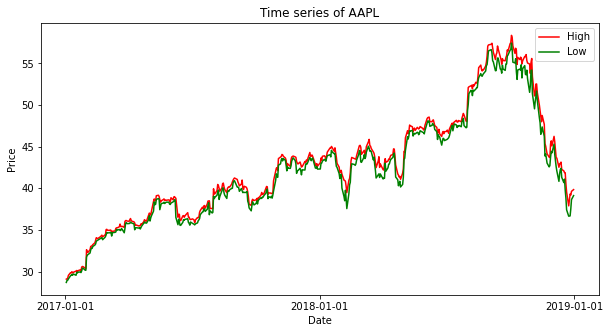

In [20]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(df['High'],c ='r', label ='High')
ax.plot(df['Low'], c = 'g', label ='Low')
ax.legend()

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Time series of AAPL')


ax.xaxis.set_major_locator(mdates.YearLocator())

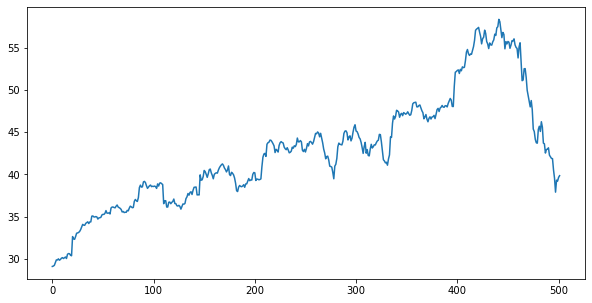

In [9]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(df['High'].tolist())

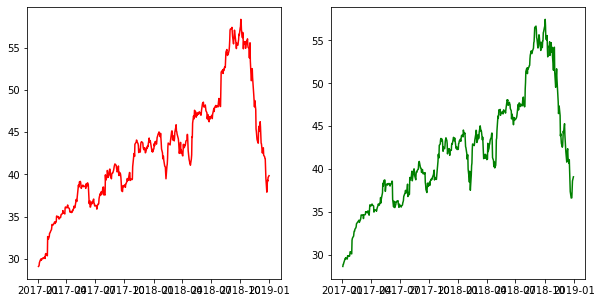

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(df['High'],c ='r', label ='High')
ax2.plot(df['Low'], c = 'g', label ='Low')

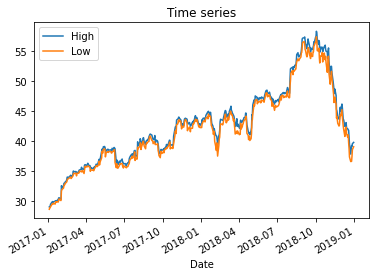

In [34]:
ax = df[['High','Low']].plot.line()

ax.set_title('Time series');

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [5]:
df['year'] = df.index.year.astype(str)
df['quarter'] = df.index.quarter.astype(str)
df.head(2)

,High,Low,Open,Close,Volume,Adj Close,year,quarter
Date,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219831,2017,1
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189367,2017,1


In [14]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [15]:
# sns.boxplot(
#     data = df,
#     x='High',
#     y = 'year',
#     hue = 'quarter')

In [55]:
sns.__version__

'0.10.1'

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 31.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня, по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [71]:
df = np.load('average_ratings.npy') #.reshape(1095,3)
df.shape

(3, 1095)

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

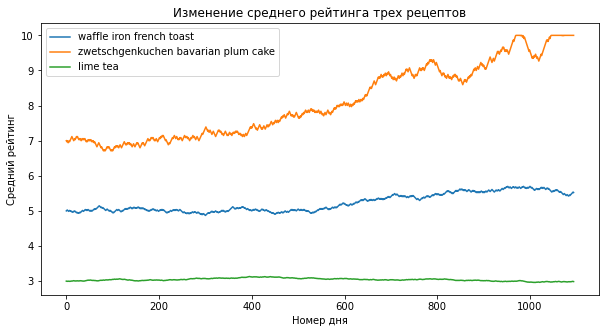

In [72]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(np.arange(0,len(df[0])), df[0], label = 'waffle iron french toast')
ax.plot(np.arange(0,len(df[0])), df[1], label = 'zwetschgenkuchen bavarian plum cake' )
ax.plot(np.arange(0,len(df[0])), df[2], label = 'lime tea')

ax.legend()

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')



In [59]:
np.arange(0,len(df[0]))

array([   0,    1,    2, ..., 1092, 1093, 1094])

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 31.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [127]:
per = pd.date_range(start = '01.01.2019', end='30.12.2021', freq='D') # end= '31.12.2021'

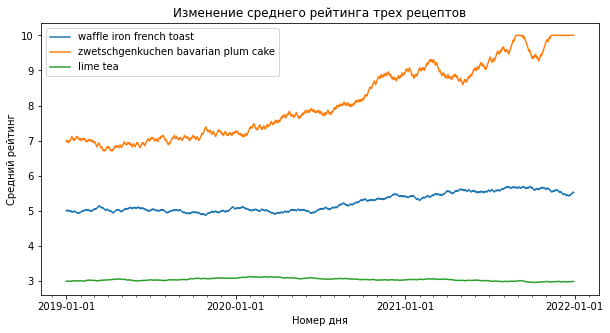

In [247]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(per,df[0], label = 'waffle iron french toast')
ax.plot(per,df[1], label = 'zwetschgenkuchen bavarian plum cake' )
ax.plot(per,df[2], label = 'lime tea')

ax.legend()
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

In [124]:
per

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

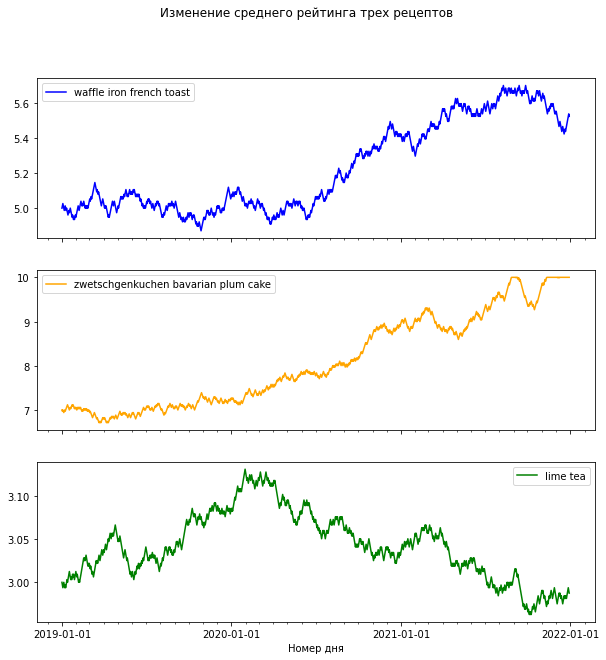

In [248]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10))
ax1.plot(per,df[0], label = 'waffle iron french toast', c ='b')
ax2.plot(per,df[1], label = 'zwetschgenkuchen bavarian plum cake', c ='orange' )
ax3.plot(per,df[2], label = 'lime tea', c ='g')

ax1.legend()
ax2.legend()
ax3.legend()

ax3.set_xlabel('Номер дня')
# ax2.set_xlabel('Номер дня')
# ax3.set_xlabel('Номер дня')

ax.set_ylabel('Средний рейтинг')

fig.suptitle('Изменение среднего рейтинга трех рецептов')
 
ax1.set_xticklabels([])
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

ax2.set_xticklabels([])
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_minor_locator(mdates.MonthLocator())

ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_minor_locator(mdates.MonthLocator())



4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [163]:
df2 = np.load('visitors.npy')


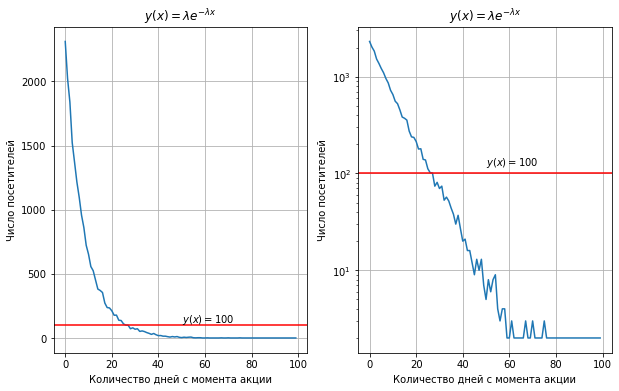

In [286]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,6))
ax1.plot(df2)
ax2.plot(df2) #list(map(lambda x: math.log(x),df2))

ax1.axhline(y=100, c = 'r')
ax1.text(50,120,'$y(x)=100$')
ax2.axhline(y=100, c = 'r')
ax2.text(50,120,'$y(x)=100$')
 
a = '$y(x)=\lambda e^{-\lambda x}$'
ax1.set_title(a)
ax2.set_title(a)

ax2.set_yscale('log')

ax1.set_xlabel('Количество дней с момента акции')
ax2.set_xlabel('Количество дней с момента акции')

ax1.set_ylabel('Число посетителей')
ax2.set_ylabel('Число посетителей')

ax1.grid()
ax2.grid()


In [268]:
# import math
# list(map(lambda x: math.log10(x),df2))

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [277]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

In [373]:
recipes.head(2)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [355]:
short = recipes[recipes['minutes'] < 5] #короткие
middle = recipes[(recipes['minutes'] > 5) & ((recipes['minutes'] < 49))] #средние
long = recipes[recipes['minutes'] > 50] #длинные
# recipes.groupby(long).count() #длинные
#recipes[['n_steps']].groupby(recipes['minutes']<5).mean()

In [367]:
hist_ = list((long['n_steps'].mean(),middle['n_steps'].mean(),short['n_steps'].mean()))
#plt.bar([  'длинные рецепты','средние рецепты','короткие рецепты'],hist_)

In [366]:
pie_ = list((long['n_steps'].count(),middle['n_steps'].count(),short['n_steps'].count()))


Text(0.5, 0, 'Размеры групп рецептов')

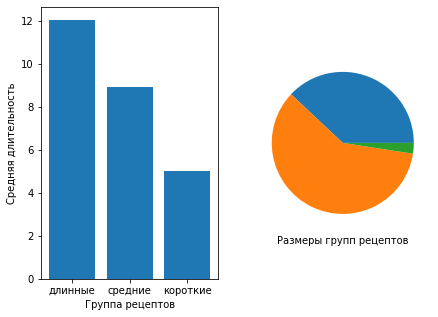

In [372]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (7,5))
ax1.bar(['длинные','средние','короткие'],hist_)
ax2.pie(pie_)

ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')

ax2.set_xlabel('Размеры групп рецептов')

In [512]:
def groups(i):
    if i < 5: 
        return 'Короткие'
    elif 5 <= i < 50: 
        return 'Средние'
    elif i > 50: 
        return 'Длинные'


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [404]:
reviews['date'] = pd.to_datetime(reviews['date'])

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

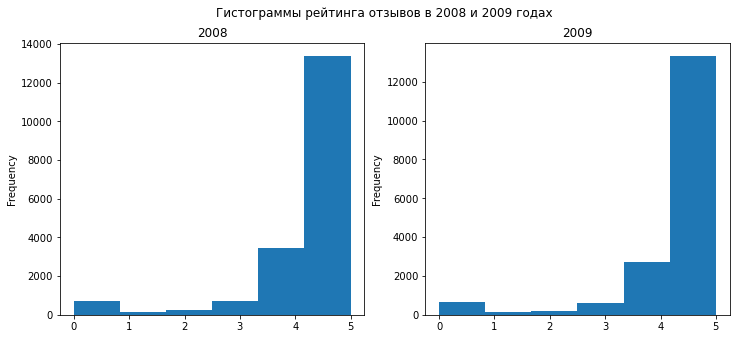

In [515]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
reviews['rating'][(reviews['date'].dt.year == 2008)].plot.hist(ax = ax1, title = '2008', bins = 6)
reviews['rating'][(reviews['date'].dt.year == 2009)].plot.hist(ax = ax2, title = '2009', bins = 6)


fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [500]:
import seaborn as sns

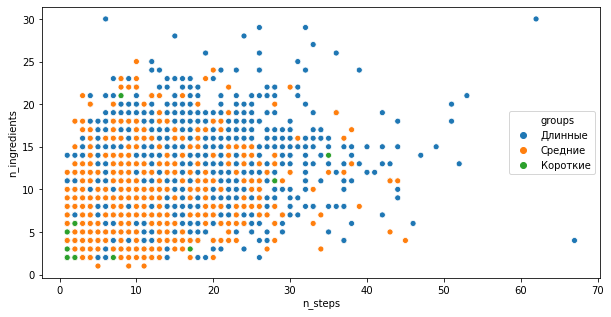

In [511]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'n_steps',
               y = 'n_ingredients',
                hue = 'groups',
               data = recipes)

In [508]:
recipes['groups'] = recipes['minutes'].apply(groups)

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

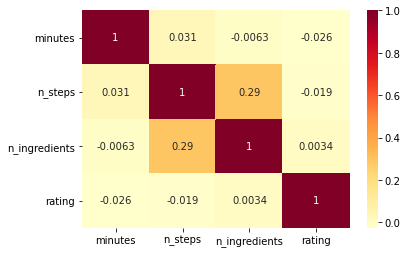

In [525]:
data = reviews.merge(recipes, how = 'left', left_on='recipe_id', right_on='id')

sns.heatmap(data[['minutes','n_steps','n_ingredients','rating']].corr(), annot = True, cmap='YlOrRd')
